# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# Sampling error in regression

This demonstration is a visual-aid, not a programming-aid. In this notebook, I have set up some visualizations and analyses for sampling error principles. In each of the sections, there are either 1 or 2 lines of code for you to change. Changing the sample size or the number of samples to draw will automatically sample data and generate some visualizations to see what happens.

**Instructions**:

- In each mini section, change the numeric values of the *specified* objects (e.g., `SampleSize <- 5` to `SampleSize <- 500`) and evaluate the code to see what happens and what changes occur. **Try multiple different numbers.**

- You do not need to understand the code in this demonstration! There are some seemingly complicated segments of code but these are either generating random samples from a population or to create visualizations. **You will not need to know how to generate samples in this class, these are more programming than statistics concepts.**

## Load and install packages

We will use the Galton dataset from previously in this course. There are some unfamiliar packages in use today (i.e., MASS & gridExtra). You will not need to know the code

In [5]:
## Install package to show side-by-side plots
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
## Load packages
library(MASS)
library(tidyverse)
library(gridExtra)

## Load data
## Set the URL to Casey's GitHub page where the dataset is located
FileURL <- "https://raw.githubusercontent.com/CaseyGio/Psyc6290/refs/heads/main/Datasets/Galton.csv"

## Read the csv file from GitHub and create a new object
Galton <- read_csv(url(FileURL))

## Check out the dataset
head(Galton, n = 10)



## Ignore code below, extracting mean/SD and variance-covariance matrix



## Father heights mean
MeanFather <- mean(Galton$Father)

## Father heights SD
VarFather <- var(Galton$Father)

## Son heights mean
MeanSon <- Galton %>% filter(Gender == "M") %>% summarize(Avg = mean(Height)) %>% as.numeric()

## Son heights SD
VarSon <- Galton %>% filter(Gender == "M") %>% summarize(SD = var(Height)) %>% as.numeric()

## Height correlation
Cov <-
  Galton %>%
  filter(Gender == "M") %>%
  summarize(Cov = cov(Height, Father)) %>%
  as.numeric()

## Variance-covariance matrix of father/son heights
VCovMat <- matrix(c(VarFather, Cov, Cov, VarSon), nrow = 2, ncol = 2, byrow = TRUE)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Rows: 898 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Gender
dbl (5): Family, Father, Mother, Height, Kids

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Family,Father,Mother,Gender,Height,Kids
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,78.5,67.0,M,73.2,4
1,78.5,67.0,F,69.2,4
1,78.5,67.0,F,69.0,4
1,78.5,67.0,F,69.0,4
2,75.5,66.5,M,73.5,4
2,75.5,66.5,M,72.5,4
2,75.5,66.5,F,65.5,4
2,75.5,66.5,F,65.5,4
3,75.0,64.0,M,71.0,2


# Drawing random samples of a specific size

In the simulation below, we are using the population data from Galton's dataset and _randomly_ generating 5 observations with the same expected mean and standard deviation.

**Instructions**:

- Change the `SampleSize <- 5` code to different numbers to see what 3 random samples from the Galton population may look like.
  
  - Try samples of size 5, 50, and 500.
  
  - Few samples (e.g., 5) makes it hard to make a "normal" distribution. Larger samples are required to make the distribution look more like a "normal" distribution.

- Ignore the warning messages.


     

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


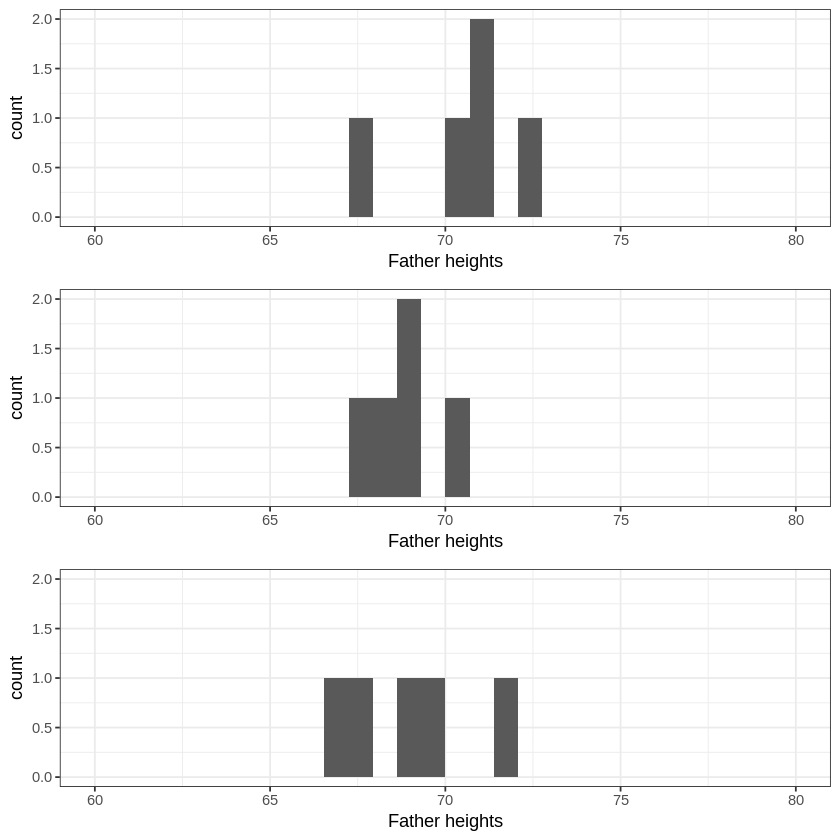

In [53]:
## The number of observations to draw for each sample
SampleSize <- 5



## For the code to work, do not change the code below



## Sampling father heights only
set.seed(432) ## Makes reproducible "random" numbers

## Draw random samples with a specific mean & SD
H1.5 <- rnorm(n    = SampleSize,
              mean = MeanFather,
              sd   = sqrt(VarFather)) %>%
  as.data.frame()

## Draw random samples with a specific mean & SD
H2.5 <- rnorm(n    = SampleSize,
              mean = MeanFather,
              sd   = sqrt(VarFather)) %>%
  as.data.frame()

## Draw random samples with a specific mean & SD
H3.5 <- rnorm(n    = SampleSize,
              mean = MeanFather,
              sd   = sqrt(VarFather)) %>%
  as.data.frame()

## Summarize first set of data
Hist1 <-
  ggplot(data = H1.5, mapping = aes(x = .)) +
  geom_histogram() +
  labs(x = "Father heights") +
  scale_x_continuous(limits = c(60, 80)) +
  scale_y_continuous(limits = c(0, 2)) +
  theme_bw()

## Summarize second set of data
Hist2 <- ggplot(data = H2.5, mapping = aes(x = .)) +
  geom_histogram() +
  labs(x = "Father heights") +
  scale_x_continuous(limits = c(60, 80)) +
  scale_y_continuous(limits = c(0, 2)) +
  theme_bw()

## Summarize third set of data
Hist3 <- ggplot(data = H3.5, , mapping = aes(x = .)) +
  geom_histogram() +
  labs(x = "Father heights") +
  scale_x_continuous(limits = c(60, 80)) +
  scale_y_continuous(limits = c(0, 2)) +
  theme_bw()

## Place 3 plots together
gridExtra::grid.arrange(Hist1, Hist2, Hist3)

# Sampling distributions

In this section of code, we show sampling distributions. Recall that a sampling distribution shows a single sample statistic (here, the mean/average) of a single sample, repeated across many different samples. This shows how much variability or "sampling error" there is when drawing samples from a single population.

All values are drawn from the same Galton population.

**Instructions**:

1) Change the `ObsPerSample <- 50` value to another number (e.g., 5, 50, and 500) keep `NSamples` at the same value (e.g., 1000). This will demonstrate what happens when we change the sample size and hold the other factors constant. If the value is 50 (the default), there will be 50 observations within each sample.
  
  - Increasing this number will decrease the variability (i.e., width, spread) of the distribution.

  - Decreasing this number will increase the variability of the distribution.

2) Change the `NSamples <- 1000` value to another number (e.g., 100, 500, 1000) and keep `ObsPerSample` set to 5. This will demonstrate what happens when we change the *number of samples* to draw. If the value is 1000, there will be 1,000 different samples drawn from the same population.

  - Increasing this number will make the distribution appear to look more similar to a normal distribution.

  - Decreasing this number will make the distribution distort the appearance and make it harder to approximate a normal distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


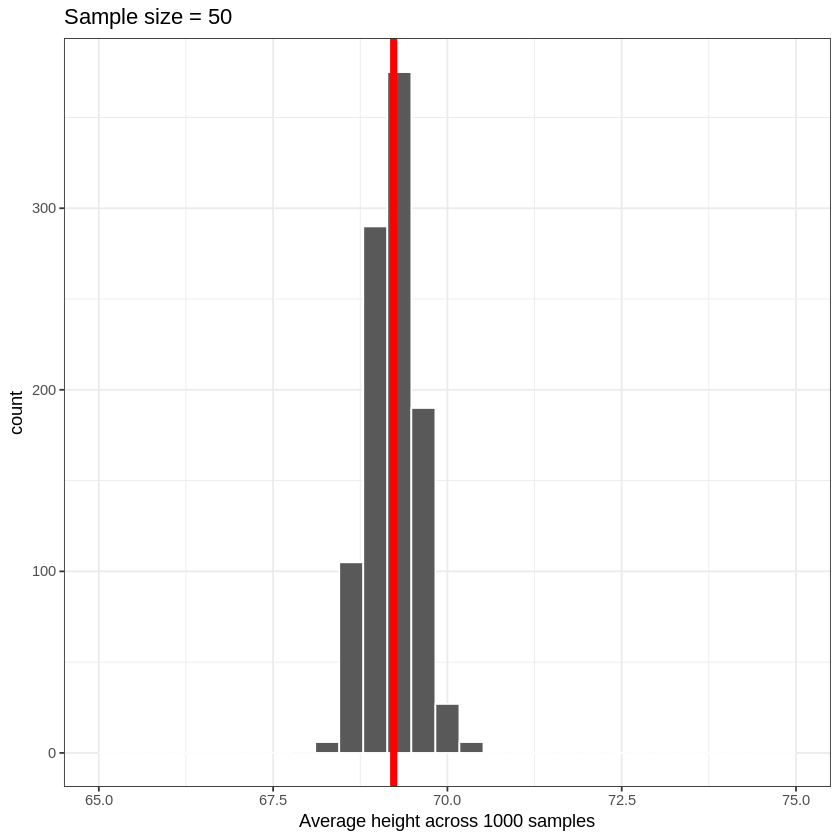

In [52]:
## Sample size for the simulatiom of sampling distributions
ObsPerSample <- 50

## Number of samples to draw
NSamples <- 1000


## For the code to work, do not change the code below



## Loop to simulation many samples of random people each
set.seed(567) ## Make reproducible "random" numbers

## Initialize vector of empty values to populate with random means
Results <- rep(NA, NSamples)

## Doing all the contents NSamples number of times
for (i in seq_len(length(Results))) {

  ## Randomly draw observations based on sample size, mean, and SD
  Tmp <- rnorm(n = ObsPerSample, mean = MeanFather, sd = sqrt(VarFather))

  ## Calculate the mean
  Results[i] <- mean(Tmp)
}

## Plot the sampling distribution
ggplot(data = as.data.frame(Results), mapping = aes(x = Results)) +
  geom_histogram(color = "white") +
  geom_vline(xintercept = mean(Results), color = "red", linewidth = 2) +
  scale_x_continuous(limits = c(65, 75)) +
  labs(title = paste0("Sample size = ", ObsPerSample), x = paste0("Average height across ", NSamples, " samples")) +
  theme_bw()


# Sampling error in regression

The simulation below demonstrates how regression parameters can change based on the size of the sample. Here, we have regression models for 3 samples and the population, including the visualization for the former models.

**Instructions**:

- Change the `SampleSize <- 25` code to a different value (e.g., 5, 50, 250) to see how much the sample-based regression parameter estimates change.

  - Decreasing the sample size will introduce more variability to parameter estimation, we are more likely to deviate from the population value. This occurs *on average* so an individual sample might be close or far away from the population value.

  - Increasing the sample size will introduce less variability to parameter estimation, we are less likely to deviate from the population value.

Model,SampleSize,Intercept,Slope
<chr>,<dbl>,<dbl>,<dbl>
Population,898,45.492,0.342
Mod1,25,44.781,0.369
Mod2,25,45.411,0.346
Mod3,25,54.306,0.217


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


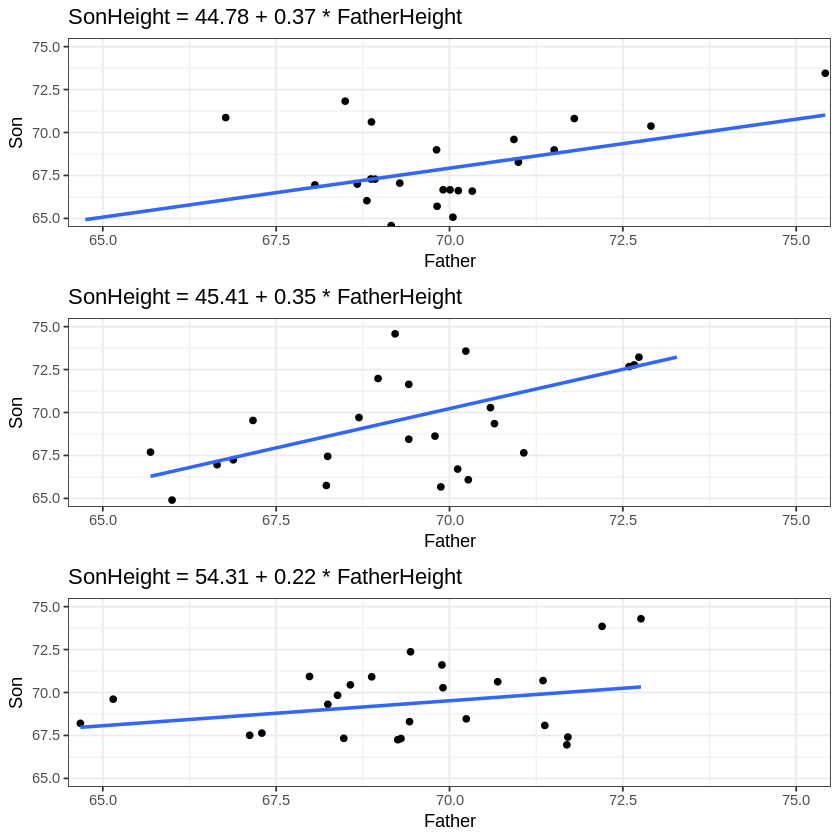

In [51]:
## Set the sample size
SampleSize <- 25



## For the code to work, do not change the code below





## Create 3 samples, each with a set sample size
set.seed(1234) ## Reproduce random numbers

## Sample 1
Samp1 <- mvrnorm(n     = SampleSize, ## Draw correlated data of this size
                 mu    = c(MeanFather, MeanSon), ## Averages of 2 variables
                 Sigma = VCovMat) %>%  ## Variance-covariance matrix
  as.data.frame()

## Sample 2
Samp2 <- mvrnorm(n     = SampleSize, ## Draw correlated data of this size
                 mu    = c(MeanFather, MeanSon), ## Averages of 2 variables
                 Sigma = VCovMat) %>%  ## Variance-covariance matrix
  as.data.frame()

## Sample 3
Samp3 <- mvrnorm(n     = SampleSize, ## Draw correlated data of this size
                 mu    = c(MeanFather, MeanSon), ## Averages of 2 variables
                 Sigma = VCovMat) %>%  ## Variance-covariance matrix
  as.data.frame()

## Set column names
colnames(Samp1) <- colnames(Samp2) <- colnames(Samp3) <- c("Father", "Son")

## Estimate regression models
Mod1 <- lm(Father ~ Son, data = Samp1)
Mod2 <- lm(Father ~ Son, data = Samp2)
Mod3 <- lm(Father ~ Son, data = Samp3)

## Population model
Population <-
  Galton %>%
  filter(Gender == "M") %>%
  lm(Father ~ Height, data = .)

## Data frame of regression output
data.frame("Model" = c("Population", paste0("Mod", 1:3)),
           "SampleSize" = c(nrow(Galton), rep(SampleSize, 3)),
           "Intercept"  = round(c(Population$coefficients[1], Mod1$coefficients[1], Mod2$coefficients[1], Mod3$coefficients[1]), 3),
           "Slope"      = round(c(Population$coefficients[2], Mod1$coefficients[2], Mod2$coefficients[2], Mod3$coefficients[2]), 3))

## Summarize regression models
#summary(Mod1)
#summary(Mod2)
#summary(Mod3)

## Plot distribution of heights
Samp1P <-
  ggplot(data = Samp1, mapping = aes(x = Father, y = Son)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, fullrange = TRUE) +
  coord_cartesian(xlim = c(65, 75), ylim = c(65, 75)) +
  labs(title = paste("SonHeight =", round(Mod1$coefficients[1], 2), "+", round(Mod1$coefficients[2], 2), "* FatherHeight")) +
  theme_bw()

Samp2P <-
  ggplot(data = Samp2, mapping = aes(x = Father, y = Son)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, fullrange = TRUE) +
  coord_cartesian(xlim = c(65, 75), ylim = c(65, 75)) +
  labs(title = paste("SonHeight =", round(Mod2$coefficients[1], 2), "+", round(Mod2$coefficients[2], 2), "* FatherHeight")) +
  theme_bw()

Samp3P <-
  ggplot(data = Samp3, mapping = aes(x = Father, y = Son)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, fullrange = TRUE) +
  coord_cartesian(xlim = c(65, 75), ylim = c(65, 75)) +
  labs(title = paste("SonHeight =", round(Mod3$coefficients[1], 2), "+", round(Mod3$coefficients[2], 2), "* FatherHeight")) +
  theme_bw()

## Put all three on the same plot
gridExtra::grid.arrange(Samp1P, Samp2P, Samp3P)